### Shreyas Panzade
### 22102B2002
### B.E. CMPN-B B4
### ML Expt8

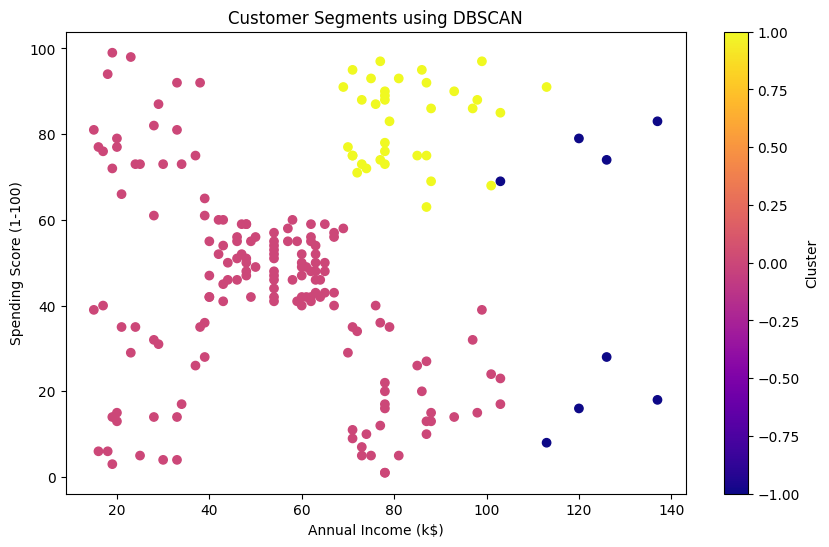

Number of clusters found: 2
Number of noise points: 8
Silhouette Score: 0.35044619989666004


In [3]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Step 2: Load the Dataset
# You can replace the below path with your own file if using Colab
url = '/content/Mall_Customers.csv'
data = pd.read_csv(url)

# Step 3: Preprocess the Data
# Select relevant features: 'Annual Income' and 'Spending Score'
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data for better clustering results
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply DBSCAN Algorithm
# Initialize DBSCAN with default parameters (you can tune epsilon and min_samples)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# Add the cluster labels to the dataset
data['Cluster'] = dbscan.labels_

# Step 5: Visualize the Clusters
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='plasma')
plt.title('Customer Segments using DBSCAN')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.show()

# Step 6: Analyze Results
# Print the number of clusters and noise points
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)

print(f'Number of clusters found: {n_clusters}')
print(f'Number of noise points: {n_noise}')

# Optional: Evaluate the clustering using Silhouette Score
if n_clusters > 1:
    silhouette_score = metrics.silhouette_score(X_scaled, dbscan.labels_)
    print(f'Silhouette Score: {silhouette_score}')
else:
    print("Not enough clusters for Silhouette Score calculation.")
